In [1]:
import alphalens

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Let's first read in the tickers

In [2]:
import pandas as pd
ticker = pd.read_csv('./Three+Factors+Alpha.csv', index_col = 0).index


In [3]:
ticker

Index([u'A', u'AA', u'AAL', u'AAP', u'AAPL', u'ABBV', u'ABC', u'ABMD', u'ABT',
       u'ACAD',
       ...
       u'YUM', u'YUMC', u'Z', u'ZAYO', u'ZBH', u'ZBRA', u'ZG', u'ZION',
       u'ZNGA', u'ZTS'],
      dtype='object', length=978)

now read in the price data

In [22]:
price = {}
for s in ticker:
    price[s] = pd.read_csv('./price_data/'+s+'.csv', index_col =0, parse_dates=True)
    

In [26]:
pricing =pd.Panel.from_dict(price)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [36]:
close_pricing = pricing.loc[:,:,'Close']

create a dictionary that contains the ticker_sector

In [5]:
sector_name ={
    0: "xly",
    1: "xlp",
    2: "xle",
    3: "xlf",
    4: "xlv",
    5: "xli",
    6: "xlre",
    7: "xlk",
    8: "xlu",
    9: "xlb",
             }

In [6]:
sector ={}
for i in range(10):
    index = pd.read_csv('./rank_result/'+sector_name[i]+'_rank.csv', index_col =0).index
    for s in index:
        sector[s] = i
    

read in the factors

In [8]:
factor = pd.DataFrame()
for s in ticker:
    factor[s] = pd.read_csv('./Ticker alpha Rolling window half a year/'+s+'.csv',\
                            index_col ='date', parse_dates=True).Alpha

In [41]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor.stack(), 
                                                                   close_pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=sector,
                                                                   periods =(1,5,10,21,42,63,125),
                                                                   groupby_labels=sector_name)

In [44]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [48]:
ic.tail()

,1,5,10,21,42,63,125
date,,,,,,,
2017-02-16,-0.235268,-0.259352,-0.227947,-0.271594,-0.297778,-0.298352,-0.284488
2017-02-17,-0.014485,-0.283635,-0.197802,-0.368404,-0.379645,-0.372206,-0.383354
2017-03-16,-0.079363,-0.187335,-0.035774,-0.117527,-0.199859,-0.258023,-0.241743
2017-03-17,-0.169340,-0.505080,-0.160124,-0.345648,-0.340401,-0.327410,-0.307672
2017-04-17,-0.267388,0.127853,-0.041193,-0.090292,-0.173381,-0.127688,-0.086445


Populating the interactive namespace from numpy and matplotlib


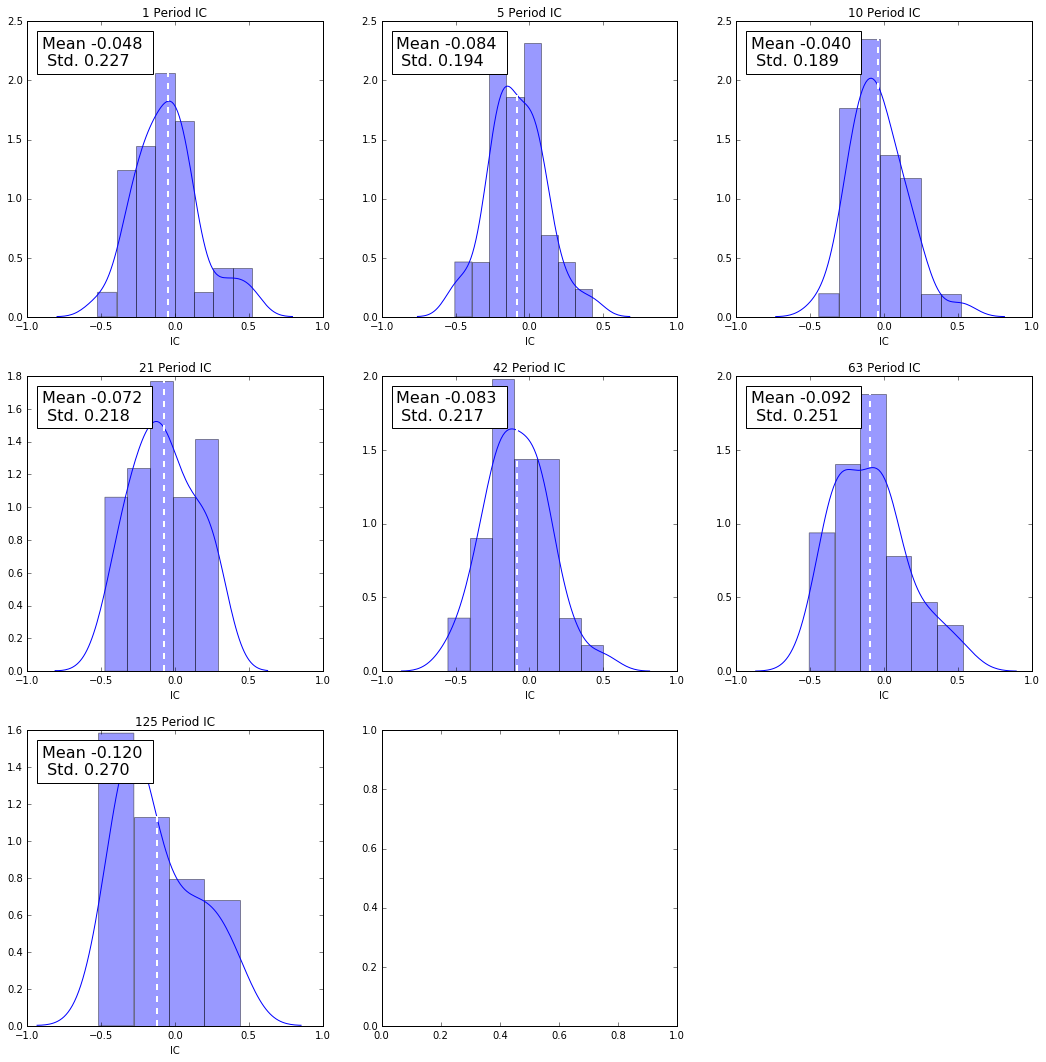

In [47]:
%pylab inline
alphalens.plotting.plot_ic_hist(ic);